# Conway's Game of Life in Tensorflow

Source: https://github.com/conceptacid/conv2d_life

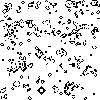

.

KeyboardInterrupt: 

In [48]:
import numpy as np
import tensorflow as tf

#Imports for visualization
import PIL.Image
from matplotlib import cm
from io import BytesIO
from IPython.display import clear_output, Image, display

def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = np.squeeze(a)
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  a = np.array(a)
  PIL.Image.fromarray(a.astype(np.uint8)).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

W = 100
H = 100

npstate0 = np.random.randint(low=0, high=2, size=[H,W])
npstate0 = np.asarray(npstate0, dtype=np.float32)

state0 = tf.convert_to_tensor(npstate0)
state = tf.Variable(tf.cast(tf.reshape(state0,[1,H,W,1]), tf.float32))

# kernel is 8-membered Moore neighborhood
kernel = tf.reshape(tf.ones([3,3]), [3,3,1,1])

# compute number of neighbors using convolution of kernel over state 
neighbours = tf.nn.conv2d(state, kernel, [1,1,1,1], "SAME") - state

# Game of Life rules
survive = tf.logical_and( tf.equal(state, 1), tf.equal(neighbours, 2))
born = tf.equal(neighbours, 3)
newstate = tf.cast(tf.logical_or(survive, born), tf.float32)

init = tf.global_variables_initializer()

interval = 2

fig = plt.figure()
with tf.Session() as sess:
    sess.run(init)
    sess.run(newstate)
    newstate_ = sess.run(tf.reshape(newstate, [H,W]))
    sess.run(tf.assign(state, newstate))

    def step(sess, state, newstate):
        sess.run(newstate)
        newstate_ = sess.run(tf.reshape(newstate, [H,W]))
        sess.run(tf.assign(state, newstate))
        print('.',end='')
        return plot

    for i in range(1000):
        step(sess, state, newstate)
        if i % interval == 0:
            DisplayArray(newstate.eval(), rng=[1,0])
